In [222]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
import assignment3_functions as library
import pandas as pd
pd.options.display.max_columns = 999

#### Explore Data

In [224]:
donors_df = library.file_to_dataframe("projects_2012_2013.csv")

In [225]:
donors_df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,f,f,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,f,f,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,f,f,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


#### Create outcome variable

In [226]:
donors_df['date_posted'] = pd.to_datetime(donors_df['date_posted'], format='%m/%d/%y')
donors_df['datefullyfunded'] = pd.to_datetime(donors_df['datefullyfunded'], format='%m/%d/%y')
donors_df['60_days_fullyfunded'] = (donors_df['datefullyfunded'] - donors_df['date_posted'] <= pd.to_timedelta(60, unit='days')).astype('int')
donors_df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,60_days_fullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,f,f,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,2013-04-14,2013-05-02,1
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,f,f,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,2012-04-07,2012-04-18,1
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,2012-01-30,2012-04-15,0
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,2012-10-11,2012-12-05,1
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,f,f,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,2013-01-08,2013-03-25,0


#### Change certain columns to dummies from 't', 'f'

In [227]:
cols_list = ['eligible_double_your_impact_match', 'school_magnet', 'school_charter']

In [228]:
library.cols_to_dummy(donors_df, cols_list, 't')

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,60_days_fullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,0,0,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,0,2013-04-14,2013-05-02,1
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,0,0,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,1,2012-04-07,2012-04-18,1
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,0,0,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,0,2012-01-30,2012-04-15,0
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,0,2012-10-11,2012-12-05,1
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,0,0,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,0,2013-01-08,2013-03-25,0
5,00049ec8ca1f2d08cb13cab31b0b85ec,7149611553c700de9a6099f8a9ce598b,462a5fd93cf9fb5d41eecfd2ea860b19,2.621150e+11,42.740157,-84.525821,Lansing,MI,urban,Lansing School District,Ingham,0,0,Mrs.,Literacy,Literacy & Language,NaN,NaN,Other,highest poverty,Grades 3-5,475.85,15.0,0,2012-11-30,2013-02-26,0
6,0004d2fdbb571237fa53a97e7691440b,926671e209fb977bd5123145c1848ad1,1a994778027ab086dc58ec3b47f74ff0,4.047200e+10,33.059361,-112.037727,Maricopa,AZ,rural,Maricopa Unif Sch District 20,Pinal,0,0,Ms.,Literacy,Literacy & Language,NaN,NaN,Supplies,high poverty,Grades 3-5,390.65,37.0,0,2013-03-26,2013-04-17,1
7,0004ee26667e751dd51384eb9f30c72e,abe4dabb7864f4c548d230cf9070e03f,8409f70bcd81bc06e4b9efca68eed8f6,6.280501e+10,37.761958,-122.193209,Oakland,CA,urban,Oakland Unified School Dist,Alameda,0,0,Mr.,Mathematics,Math & Science,NaN,NaN,Books,highest poverty,Grades 9-12,3877.20,30.0,0,2013-02-28,2013-03-10,1
8,0006a31d45f8d52d217e7c5b55c11f37,3b5fada1ad0e339acc669829071320c4,c6a033f9349ea70659c1891b119680ed,2.307320e+11,44.096641,-70.191734,Lewiston,ME,urban,Lewiston Public Schools,Androscoggin,0,0,Mrs.,Other,Applied Learning,NaN,NaN,Technology,high poverty,Grades 3-5,838.75,25.0,0,2013-08-21,2013-09-13,1
9,0008ac907bf237a15a959244205d3ee5,92527a5ac5fe946ed1961fb2e1de8cc5,23e34f5d2e2940684269cffe35741598,6.271800e+10,34.381832,-118.531837,Newhall,CA,suburban,Newhall School District,Los Angeles,0,0,Ms.,Mathematics,Math & Science,Literacy,Literacy & Language,Technology,highest poverty,Grades PreK-2,1477.44,24.0,0,2012-10-03,2012-11-03,1


In [229]:
#drop ID columns

In [230]:
donors_df.drop(labels = ['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid'], axis=1, inplace=True)

In [231]:
#drop geographical columns that are redundant

In [232]:
donors_df.drop(labels = ['school_city', 'school_state', 'school_metro', 'school_latitude', 'school_longitude', 'school_county'], axis=1, inplace=True)
donors_df

,school_district,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,60_days_fullyfunded
0,Pershing Elem Network,0,0,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,0,2013-04-14,2013-05-02,1
1,Ventura Unif School District,0,0,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,1,2012-04-07,2012-04-18,1
2,Los Angeles Unif Sch Dist,0,0,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,0,2012-01-30,2012-04-15,0
3,New York City Dept Of Ed,0,1,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,0,2012-10-11,2012-12-05,1
4,Central Islip Union Free SD,0,0,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,0,2013-01-08,2013-03-25,0
5,Lansing School District,0,0,Mrs.,Literacy,Literacy & Language,NaN,NaN,Other,highest poverty,Grades 3-5,475.85,15.0,0,2012-11-30,2013-02-26,0
6,Maricopa Unif Sch District 20,0,0,Ms.,Literacy,Literacy & Language,NaN,NaN,Supplies,high poverty,Grades 3-5,390.65,37.0,0,2013-03-26,2013-04-17,1
7,Oakland Unified School Dist,0,0,Mr.,Mathematics,Math & Science,NaN,NaN,Books,highest poverty,Grades 9-12,3877.20,30.0,0,2013-02-28,2013-03-10,1
8,Lewiston Public Schools,0,0,Mrs.,Other,Applied Learning,NaN,NaN,Technology,high poverty,Grades 3-5,838.75,25.0,0,2013-08-21,2013-09-13,1
9,Newhall School District,0,0,Ms.,Mathematics,Math & Science,Literacy,Literacy & Language,Technology,highest poverty,Grades PreK-2,1477.44,24.0,0,2012-10-03,2012-11-03,1


#### Correlations

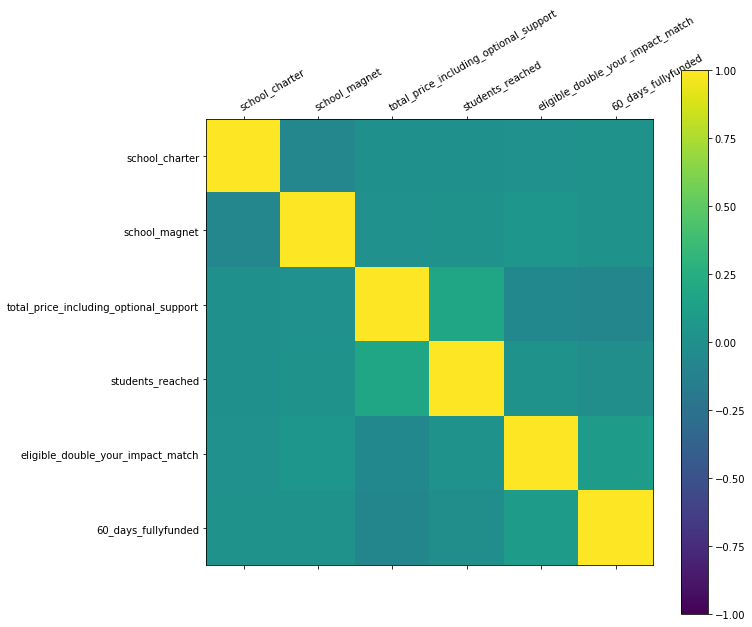

In [233]:
correlations = library.correlations(donors_df)
correlation_matrix = library.correlation_matrix(correlations)

In [234]:
library.na_summary(donors_df)

school_district                             172
school_charter                                0
school_magnet                                 0
teacher_prefix                                0
primary_focus_subject                        15
primary_focus_area                           15
secondary_focus_subject                   40556
secondary_focus_area                      40556
resource_type                                17
poverty_level                                 0
grade_level                                   3
total_price_including_optional_support        0
students_reached                             59
eligible_double_your_impact_match             0
date_posted                                   0
datefullyfunded                               0
60_days_fullyfunded                           0
dtype: int64

In [235]:
#drop secondary_focus cols

In [236]:
donors_df.drop(labels = ['secondary_focus_subject', 'secondary_focus_area', 'datefullyfunded'], axis=1, inplace=True)

In [237]:
vars_to_categorize = ['teacher_prefix', 'primary_focus_subject', 'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'school_district']
donors_df = library.categorize(donors_df, vars_to_categorize)
donors_df.head()

,school_charter,school_magnet,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,60_days_fullyfunded,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,school_district_Abbeville Co School District,school_district_Abc Unified School District,school_district_Aberdeen School District 5,school_district_Abilene Ind School District,school_district_Abingdon Cmty Unit SD 217,school_district_Abington Public Sch District,school_district_Abington School District,school_district_Absecon City Elem Sch District,school_district_Academy School District 20,school_district_Acadia Parish School District,school_district_Acalanes Union High Sch Dist,school_district_Accomack Co School District,school_district_Achievement School District,school_district_Acton Agua Dulce Unif Sch Dist,school_district_Acton Public School District,school_district_Ada School District 19,school_district_Adair Co School District,school_district_Adair School District I-2,school_district_Adams 12 Five Star Schools,school_district_Adams Co School District 14,school_district_Adams Co School District 50,school_district_Adams-cheshire Reg Sch Dist,school_district_Addison Cmty School District,school_district_Addison Elem School District 4,school_district_Addison Northeast Su 1,school_district_Adel-de Soto-minburn Cmty SD,school_district_Adelanto School District,school_district_Adna School District 226,school_district_Adrian Public School District,school_district_Adrian School District R3,school_district_Advantage Academy Admin Office,school_district_Affton School District 101,school_district_Agawam School District,school_district_Agua Fria Union High SD 216,school_district_Aiken Co School District,school_district_Airport Cmty School District,school_district_Aitkin Ind School District 1,school_district_Akron Public Schools,school_district_Alachua Co School District,school_district_Alamance-burlington Sch Dist,school_district_Alameda Co Office of Education,school_district_Alameda Unified School Dist,school_district_Alamo Heights Ind School Dist,school_district_Alamogordo School District 1,school_district_Alamosa Sch Dist Re-11J,school_district_Alaska Gateway School District,school_district_Albany City School District,school_district_Albany Co School District 1,school_district_Albany Unified School District,school_district_Albemarle Co School Dis

In [238]:
vars_to_discretize = ['total_price_including_optional_support', 'students_reached']
donors_df = library.discretize(donors_df, vars_to_discretize)
donors_df.drop(labels = vars_to_discretize, axis=1, inplace=True)
vars_to_categorize = ['total_price_including_optional_support_discrete', 'students_reached_discrete']
donors_df = library.categorize(donors_df, vars_to_categorize)

In [239]:
donors_df.head()

,school_charter,school_magnet,eligible_double_your_impact_match,date_posted,60_days_fullyfunded,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,school_district_Abbeville Co School District,school_district_Abc Unified School District,school_district_Aberdeen School District 5,school_district_Abilene Ind School District,school_district_Abingdon Cmty Unit SD 217,school_district_Abington Public Sch District,school_district_Abington School District,school_district_Absecon City Elem Sch District,school_district_Academy School District 20,school_district_Acadia Parish School District,school_district_Acalanes Union High Sch Dist,school_district_Accomack Co School District,school_district_Achievement School District,school_district_Acton Agua Dulce Unif Sch Dist,school_district_Acton Public School District,school_district_Ada School District 19,school_district_Adair Co School District,school_district_Adair School District I-2,school_district_Adams 12 Five Star Schools,school_district_Adams Co School District 14,school_district_Adams Co School District 50,school_district_Adams-cheshire Reg Sch Dist,school_district_Addison Cmty School District,school_district_Addison Elem School District 4,school_district_Addison Northeast Su 1,school_district_Adel-de Soto-minburn Cmty SD,school_district_Adelanto School District,school_district_Adna School District 226,school_district_Adrian Public School District,school_district_Adrian School District R3,school_district_Advantage Academy Admin Office,school_district_Affton School District 101,school_district_Agawam School District,school_district_Agua Fria Union High SD 216,school_district_Aiken Co School District,school_district_Airport Cmty School District,school_district_Aitkin Ind School District 1,school_district_Akron Public Schools,school_district_Alachua Co School District,school_district_Alamance-burlington Sch Dist,school_district_Alameda Co Office of Education,school_district_Alameda Unified School Dist,school_district_Alamo Heights Ind School Dist,school_district_Alamogordo School District 1,school_district_Alamosa Sch Dist Re-11J,school_district_Alaska Gateway School District,school_district_Albany City School District,school_district_Albany Co School District 1,school_district_Albany Unified School District,school_district_Albemarle Co School District,school_district_Albert Lea Area Schools,school_dis

In [240]:
selected_features = [col for col in donors_df if col not in ['date_posted', 'datefullyfunded', '60_days_fullyfunded']]
x_train, x_test, y_train, y_test = library.split_data(donors_df, selected_features, ['60_days_fullyfunded'], 0.2)

In [241]:
PARAMETERS = {'RandomForest': {'n_estimators': 50, 'n_jobs': -1},
              'Boosting': {'max_depth': 1, 'algorithm': "SAMME", 'n_estimators': 200},
              'LogisticRegression': {'penalty' : 'l1', 'C': 1e5},
              'SVM': {'kernel': 'linear', 'probability': 'True', 'random_state': 0},
              'DecisionTree': {},
              'KNeighbors': {'n_neighbors': 3},
              'Bagging': {},
              'Baseline': {}
            }

MODELS_TO_RUN = ['RandomForest', 'LogisticRegression', 'DecisionTree']

MODELS_TO_RUN_small = ['RandomForest']

TEST_GRID = {
            'RandomForest': {'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
            'LogisticRegression': {'penalty': ['l1'], 'C': [0.01]},
            'Boosting': {'algorithm': ['SAMME'], 'n_estimators': [1]},
            'DecisionTreeClassifier': {'criterion': ['gini'], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
            'SVM': {'C':[0.01],'kernel':['linear']},
            'KNeighborsClassifier': {'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']},
            }

In [242]:
fitted_models = library.build_classifier(x_train, y_train, MODELS_TO_RUN_small, PARAMETERS)

running model,
RandomForest


/Users/bhargaviganesh/Documents/ml_spring19/assignment3/assignment3_functions.py:332: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained = model_obj.fit(x_train, y_train)


In [243]:
fitted_models

{'RandomForest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

In [244]:
start_time = '2012-01-01'
end_time = '2013-12-31'
prediction_window = 6
update_window = 6
temp_split = library.temporal_validate(start_time, end_time, prediction_window, update_window)

In [245]:
temp_split

[[datetime.datetime(2013, 1, 1, 0, 0),
  datetime.datetime(2013, 6, 30, 0, 0),
  datetime.datetime(2013, 7, 1, 0, 0),
  datetime.datetime(2013, 12, 31, 0, 0)],
 [datetime.datetime(2012, 7, 2, 0, 0),
  datetime.datetime(2012, 12, 30, 0, 0),
  datetime.datetime(2012, 12, 31, 0, 0),
  datetime.datetime(2013, 6, 30, 0, 0)],
 [datetime.datetime(2012, 1, 1, 0, 0),
  datetime.datetime(2012, 6, 30, 0, 0),
  datetime.datetime(2012, 7, 1, 0, 0),
  datetime.datetime(2012, 12, 30, 0, 0)]]

In [247]:
#testing train, test, split function

In [248]:
train_start, train_end, test_start, test_end = temp_split[0]
x_train, x_test, y_train, y_test = library.temporal_split(
    donors_df, 
    'date_posted', '60_days_fullyfunded',
    train_start, train_end, test_start, test_end)

In [249]:
x_train.head()

,school_charter,school_magnet,eligible_double_your_impact_match,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,school_district_Abbeville Co School District,school_district_Abc Unified School District,school_district_Aberdeen School District 5,school_district_Abilene Ind School District,school_district_Abingdon Cmty Unit SD 217,school_district_Abington Public Sch District,school_district_Abington School District,school_district_Absecon City Elem Sch District,school_district_Academy School District 20,school_district_Acadia Parish School District,school_district_Acalanes Union High Sch Dist,school_district_Accomack Co School District,school_district_Achievement School District,school_district_Acton Agua Dulce Unif Sch Dist,school_district_Acton Public School District,school_district_Ada School District 19,school_district_Adair Co School District,school_district_Adair School District I-2,school_district_Adams 12 Five Star Schools,school_district_Adams Co School District 14,school_district_Adams Co School District 50,school_district_Adams-cheshire Reg Sch Dist,school_district_Addison Cmty School District,school_district_Addison Elem School District 4,school_district_Addison Northeast Su 1,school_district_Adel-de Soto-minburn Cmty SD,school_district_Adelanto School District,school_district_Adna School District 226,school_district_Adrian Public School District,school_district_Adrian School District R3,school_district_Advantage Academy Admin Office,school_district_Affton School District 101,school_district_Agawam School District,school_district_Agua Fria Union High SD 216,school_district_Aiken Co School District,school_district_Airport Cmty School District,school_district_Aitkin Ind School District 1,school_district_Akron Public Schools,school_district_Alachua Co School District,school_district_Alamance-burlington Sch Dist,school_district_Alameda Co Office of Education,school_district_Alameda Unified School Dist,school_district_Alamo Heights Ind School Dist,school_district_Alamogordo School District 1,school_district_Alamosa Sch Dist Re-11J,school_district_Alaska Gateway School District,school_district_Albany City School District,school_district_Albany Co School District 1,school_district_Albany Unified School District,school_district_Albemarle Co School District,school_district_Albert Lea Area Schools,school_district_Alberton School District 2

In [250]:
parameters = { 
    'RandomForest':{'n_estimators': [10,100], 'max_depth': [5, 20, 100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'LogisticRegression': { 'penalty': ['l1','l2'], 'C': [0.001,0.1,1,10]},
    'DecisionTree': {'criterion': ['gini', 'entropy'], 'max_depth': [1,10,20,100],'min_samples_split': [2,5,10]},
    'SVM' :{'C' :[0.01],'kernel':['linear']},
    'KNeighbors' :{'n_neighbors': [5,25],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree']},
    'Bagging': {'n_estimators' : [10, 20], 'max_samples' : [.25, .5]}
           }

test_grid = { 
    'RF':{'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'LR': { 'penalty': ['l1'], 'C': [0.01]},
    'GB': {'n_estimators': [1], 'learning_rate' : [0.1],'subsample' : [0.5], 'max_depth': [1]},
    'DT': {'criterion': ['gini'], 'max_depth': [1],'min_samples_split': [10]},
    'SVM' :{'C' :[0.01],'kernel':['linear']},
    'KNN' :{'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']},
     'BG': {'n_estimators' : [10], 'max_samples' : [.5]}
}

In [251]:
results_df, params = library.create_temporal_eval_table(MODELS_TO_RUN_small, fitted_models, parameters, donors_df, '60_days_fullyfunded', temp_split, 'date_posted')

Running through model RandomForest...
Running through model RandomForest...
Running through model RandomForest...


In [252]:
results_df

,train_start,train_end,test_start,test_end,model_type,classifier,train_size,test_size,auc-roc,p_at_1,a_at_1,r_at_1,p_at_2,a_at_2,r_at_2,p_at_5,a_at_5,r_at_5,p_at_10,a_at_10,r_at_10,p_at_20,a_at_20,r_at_20,p_at_30,a_at_30,r_at_30,p_at_50,a_at_50,r_at_50
0,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.499345,1,0.294632,0.0139579,0.930917,0.301877,0.0260168,0.939312,0.328571,0.0656433,0.858016,0.356239,0.119924,0.865844,0.430978,0.242064,0.823094,0.478502,0.345181,0.787755,0.572396,0.550593
1,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.495999,0.975057,0.294134,0.0136097,0.962627,0.303145,0.026903,0.950634,0.329703,0.0664346,0.93365,0.371363,0.130495,0.899015,0.444246,0.251337,0.865132,0.503725,0.362811,0.816737,0.601377,0.57085
2,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.502080,0.927438,0.293183,0.0129451,0.960362,0.303054,0.0268397,0.939764,0.328616,0.0656749,0.929801,0.370593,0.129957,0.913167,0.449906,0.255294,0.860226,0.500781,0.360753,0.803786,0.588426,0.561798
3,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.501925,0.954649,0.293726,0.0133249,0.947905,0.302556,0.0264915,0.938406,0.328481,0.06558,0.922781,0.36919,0.128976,0.893468,0.442027,0.249786,0.866717,0.504675,0.363475,0.818865,0.603505,0.572337
4,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.495082,0.902494,0.292685,0.0125969,0.907135,0.300926,0.0253521,0.862772,0.320918,0.0602944,0.881567,0.360948,0.123216,0.828937,0.416216,0.231746,0.885962,0.516223,0.371546,0.844405,0.629044,0.590188
5,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.501906,0.93424,0.293319,0.01304,0.935447,0.302058,0.0261434,0.915308,0.326171,0.0639658,0.889266,0.362488,0.124292,0.858825,0.42817,0.240101,0.836453,0.486517,0.350783,0.799665,0.584305,0.558918
6,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.497691,0.809524,0.290828,0.0112993,0.87316,0.299568,0.0244026,0.949275,0.329567,0.0663396,0.743433,0.333326,0.103909,0.871731,0.433333,0.243709,0.914491,0.533339,0.38351,0.948694,0.73333,0.66308
7,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.502233,0.895692,0.292549,0.012502,0.89581,0.300473,0.0250356,0.88587,0.323228,0.0619085,0.877717,0.360178,0.122678,0.865165,0.430706,0.241874,0.846038,0.492268,0.354803,0.799076,0.583716,0.558506
8,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.501133,0.952381,0.293681,0.0132932,0.938845,0.302194,0.0262383,0.94067,0.328707,0.0657382,0.93048,0.370729,0.130052,0.891656,0.441302,0.24928,0.861736,0.501687,0.361386,0.814246,0.598886,0.569109
9,2013-01-01,2013-06-30,2013-07-01,2013-12-31,RandomForest,"(DecisionTreeClassifier(class_weight=None, cri...",21585,44167,0.502963,0.975057,0.294134,0.0136097,0.96829,0.303371,0.0270612,0.943388,0.328979,0.0659282,0.928668,0.370367,0.129799,0.901959,0.445423,0.25216,0.874415,0.509294,0.366704,0.825567,0.610207,0.577022


In [253]:
#identifying model with maximum auc_roc

In [254]:
results_without_baseline = results_df[results_df['model_type'] != 'baseline']
best_model = results_without_baseline.loc[results_without_baseline['auc-roc'].idxmax()]
best_model

train_start                                  2012-07-02 00:00:00
train_end                                    2012-12-30 00:00:00
test_start                                   2012-12-31 00:00:00
test_end                                     2013-06-30 00:00:00
model_type                                          RandomForest
classifier     (DecisionTreeClassifier(class_weight=None, cri...
train_size                                                 32540
test_size                                                  21652
auc-roc                                                 0.508856
p_at_1                                                  0.930556
a_at_1                                                  0.323527
r_at_1                                                 0.0135509
p_at_2                                                  0.928406
a_at_2                                                  0.332071
r_at_2                                                 0.0271017
p_at_5                   

In [255]:
params[43]

{'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 100,
 'n_jobs': -1}

In [256]:
selected_features

['school_charter',
 'school_magnet',
 'eligible_double_your_impact_match',
 'teacher_prefix_Dr.',
 'teacher_prefix_Mr.',
 'teacher_prefix_Mrs.',
 'teacher_prefix_Ms.',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_focus_subject_Music',
 'primary_focus_subject_Nutriti